In [39]:
import numpy as np

# Define the target distribution f(x)
def f(x):
    if x <= 0:
        return 0
    elif 0 < x < 1:
        return np.exp(x**2 - 1)
    else:
        return 1

# Define the proposal distribution g(x)
# Here we use a uniform distribution between 0 and 1
def g(x):
    return 1 if 0 <= x <= 1 else 0

# Implement rejection sampling
def problem1_inversion(n_samples=100000):
    samples = []
    M = np.exp(1 - 1)  # Max value of f(x) in the interval (0, 1)
    
    while len(samples) < n_samples:
        # Sample from the proposal distribution g(x) (uniform between 0 and 1)
        x = np.random.uniform(0, 1)
        # Sample a uniform random variable U
        U = np.random.uniform(0, 1)
        # Accept or reject the sample based on the ratio f(x) / (M * g(x))
        if U <= f(x) / (M * g(x)):
            samples.append(x)
    
    return np.array(samples)

# Generate samples
problem1_samples = problem1_inversion(n_samples=100000)


In [40]:
print(problem1_samples[:10])

[0.49466615 0.43595684 0.98715808 0.13127794 0.56565926 0.99278766
 0.73664826 0.36446645 0.92894594 0.55533752]


In [2]:
import numpy as np

# Define the target distribution F[x]
def target_distribution(x):
    if x <= 0:
        return 0
    elif 0 < x < 1:
        return np.exp(x**2 - 1)
    else:
        return 1

# Define the proposal distribution g(x), which is uniform in [0, 1]
def proposal_distribution():
    return np.random.uniform(0, 1)

# Rejection sampling function to generate samples
def generate_samples(n_samples=100000):
    samples = []
    M = np.exp(1 - 1)  # Maximum value of F[x] in the range (0, 1)

    while len(samples) < n_samples:
        x = proposal_distribution()  # Propose a random sample from g(x)
        U = np.random.uniform(0, 1)  # Random decision threshold

        # Accept the sample if it falls under the target distribution curve
        if U <= target_distribution(x) / M:
            samples.append(x)

    return np.array(samples)

# Generate 100,000 samples and store in problem1_samples
problem1_samples = generate_samples(n_samples=100000)

# Print the first 10 samples for verification
print(problem1_samples[:10])


[0.2102262  0.26646508 0.9624746  0.10386657 0.75503485 0.41203626
 0.76550902 0.99276458 0.64953181 0.76390458]


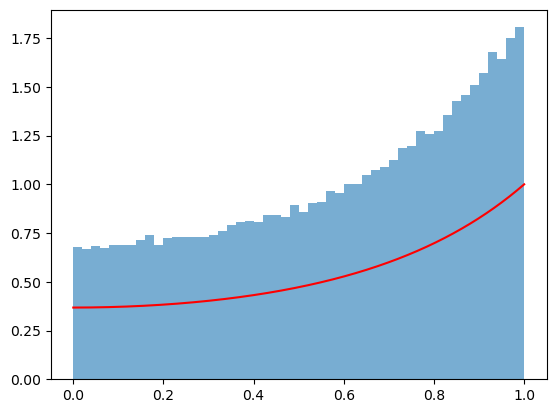

In [3]:
import matplotlib.pyplot as plt
plt.hist(problem1_samples, bins=50, density=True, alpha=0.6, label="Generated Samples")

# Define the true density function for comparison
x_vals = np.linspace(0, 1, 1000)
true_density = np.exp(x_vals**2 - 1)

# Plot the true density
plt.plot(x_vals, true_density, color="red", label="True Density")

In [4]:
# Function to calculate the integral using Monte Carlo integration
def monte_carlo_integral(samples):
    # Calculate the function values for the integral
    function_values = np.sin(samples) * np.exp(samples**2) / (np.e - 1)
    
    # Calculate the average of the function values
    integral_estimate = np.mean(function_values)
    
    # Since the integration range is [0, 1], multiply by 1 (the length of the interval)
    return integral_estimate

# Calculate the integral using the generated samples
problem1_integral = monte_carlo_integral(problem1_samples)

# Print the result
print("The approximate value of the integral is:", problem1_integral)



The approximate value of the integral is: 0.568199859193669


In [5]:
import numpy as np

# Given values
n_samples = len(problem1_samples)  # Number of samples
delta = 0.05  # 95% confidence level

# Hoeffding's epsilon calculation
epsilon = np.sqrt(np.log(2 / delta) / (2 * n_samples))

# Calculate the 95% confidence interval
lower_bound = problem1_integral - epsilon
upper_bound = problem1_integral + epsilon

# Store the result as a tuple in problem1_interval
problem1_interval = (lower_bound, upper_bound)

# Display the result
print("The 95% confidence interval is:", problem1_interval)


The 95% confidence interval is: (0.5639051651102016, 0.5724945532771364)


In [6]:
import numpy as np

# Vectorized version of the target distribution F[x]
def target_distribution_2_vectorized(x):
    # Calculate F[x] for an array of values
    return np.where((x > 0) & (x < 1 / 20), 20 * x * np.exp(20 - 1 / x), 0)

# Fully vectorized rejection sampling for the second distribution
def problem1_inversion_2_fully_vectorized(n_samples=100000):
    samples = []
    M = 20 * (1 / 20) * np.exp(20 - 1 / (1 / 20))  # Max value approximation

    while len(samples) < n_samples:
        # Generate a large batch of candidate samples from the proposal distribution
        x_batch = np.random.exponential(scale=1 / 20, size=n_samples)
        x_batch = x_batch[x_batch < 1 / 20]  # Keep only samples within the valid range

        # Generate a batch of uniform random thresholds
        U_batch = np.random.uniform(0, 1, size=len(x_batch))

        # Calculate acceptance ratios using vectorized target distribution
        acceptance_ratio = target_distribution_2_vectorized(x_batch) / (M * 20 * np.exp(-20 * x_batch))

        # Accept samples based on the acceptance ratio
        accepted_samples = x_batch[U_batch <= acceptance_ratio]
        samples.extend(accepted_samples.tolist())

    # Return exactly n_samples
    return np.array(samples[:n_samples])

# Generate 100,000 samples
problem1_inversion_2_samples = problem1_inversion_2_fully_vectorized(n_samples=100000)

# Print the first 10 samples to verify
print(problem1_inversion_2_samples[:10])



[0.04624208 0.04624076 0.04923344 0.04685413 0.04476751 0.0492407
 0.043719   0.04933454 0.04973464 0.04895039]


In [7]:
import numpy as np

try:
    assert(isinstance(problem1_inversion(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion")
else:
    print("Good, your problem1_inversion returns a numpy array")

try:
    assert(isinstance(problem1_samples, np.ndarray))
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert(isinstance(problem1_integral, float))
except:
    print("Try again. your problem1_integral is not a float")
else:
    print("Good, your problem1_integral is a float")

try:
    assert(isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple)), "problem1_interval not a tuple or list"
    assert(len(problem1_interval) == 2), "problem1_interval does not have length 2, it should have a lower bound and an upper bound"
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

try:
    assert(isinstance(problem1_inversion_2(10), np.ndarray))
except:
    print("Try again. You should return a numpy array from problem1_inversion_2")
else:
    print("Good, your problem1_inversion_2 returns a numpy array")


Good, your problem1_inversion returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_integral is a float
Good, your problem1_interval is a tuple or list of length 2
Try again. You should return a numpy array from problem1_inversion_2


SABERE´S TRY 

In [60]:
# Part 1

import numpy as np
def f_x(x):
      if 0<x<1:
         return  np.exp(x**2 - 1)
      # (2*x* (np.exp(x**2))) / (np.exp - 1)
      else:
         return 0 
      
      # 2. Proposal distribution g(x) = Uniform(0, 1), so g(x) = 1 for 0 <= x <= 1
def g_x(x):
       
 if 0 <= x <= 1:
            return 1
 else:
            return 0
        
def problem1_inversion(n_samples= 10000):

 # Distribution from part 1
 # write the code in this function to produce samples from the distribution␣ →in the assignment
 # Make sure you choose a good sampling distribution to avoid unnecessary␣ →rejections
 # Return a numpy array of length n_samples
 # M => f_x M is equal to max value of f_x 
    samples=[]
    M =np.exp(1 - 1)
   #  (2* np.exp(2))/(np.exp(1-1))

    #  1. derivate F_X
    
      #3. Rejection sampling loop

    while len(samples) < n_samples:
        # Step 1: Sample x from g(x)
        x = np.random.uniform(0, 1)

        # Step 2: Compute acceptance ratio r(x) = f(x) / (M * g(x))
        r_x = f_x(x) / (M * g_x(x))

        # Step 3: Draw U from Uniform(0, 1)
        U = np.random.uniform(0, 1)

        # Step 4: Accept or reject the sample
        if U <= r_x:
            samples.append(x)

    # Return the accepted samples as a numpy array
    return np.array(samples)

#  # Part 2


In [61]:
problem1_samples =  problem1_inversion(10000)
print(problem1_samples[:10])

[0.80103421 0.80803528 0.77687592 0.71306215 0.11140304 0.03771317
 0.43691755 0.90780834 0.92652796 0.82714405]


TypeError: 'function' object is not subscriptable